In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

kbo_batting_all = pd.read_csv("kbobattingdata.csv")
kbo_pitching_all = pd.read_csv("kbopitchingdata.csv")
mlb_pitching_all = pd.read_csv("mlbpitching.csv")

mlb_pitching_all.drop(index=mlb_pitching_all[mlb_pitching_all['year'] < 2001].index, inplace=True)
kbo_pitching_all.drop(index=kbo_pitching_all[kbo_pitching_all['year'] < 2001].index, inplace=True)
kbo_batting_all.drop(index=kbo_batting_all[kbo_batting_all['year'] < 2001].index, inplace=True)

kbo_pitching_all['win_ratio'] = (kbo_pitching_all['wins'] / (kbo_pitching_all['wins'] + kbo_pitching_all['losses'])).round(3)
kbo_batting_all = pd.merge(kbo_batting_all, kbo_pitching_all[['year', 'team', 'win_ratio']], on=['year', 'team'])

### 10구단 체제 이후 우승 팀들의 주요 스탯의 평균은 다른가?

In [15]:
kbo_pitching_10 = pd.DataFrame(kbo_pitching_all.drop(index=kbo_pitching_all[kbo_pitching_all['year'] < 2015].index))
kbo_batting_10 = pd.DataFrame(kbo_batting_all.drop(index=kbo_batting_all[kbo_batting_all['year'] < 2015].index))

kbo_pitching_10.replace("SK Wyverns", "SSG Landers", inplace=True)
kbo_pitching_10.replace("Nexen Heroes", "Kiwoom Heroes", inplace=True)
kbo_batting_10.replace("SK Wyverns", "SSG Landers", inplace=True)
kbo_batting_10.replace("Nexen Heroes", "Kiwoom Heroes", inplace=True)

Doosan Bears          AxesSubplot(0.1,0.736957;0.235294x0.163043)
Hanwha Eagles    AxesSubplot(0.382353,0.736957;0.235294x0.163043)
KT Wiz           AxesSubplot(0.664706,0.736957;0.235294x0.163043)
Kia Tigers            AxesSubplot(0.1,0.541304;0.235294x0.163043)
Kiwoom Heroes    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
LG Twins         AxesSubplot(0.664706,0.541304;0.235294x0.163043)
Lotte Giants          AxesSubplot(0.1,0.345652;0.235294x0.163043)
NC Dinos         AxesSubplot(0.382353,0.345652;0.235294x0.163043)
SSG Landers      AxesSubplot(0.664706,0.345652;0.235294x0.163043)
Samsung Lions             AxesSubplot(0.1,0.15;0.235294x0.163043)
dtype: object

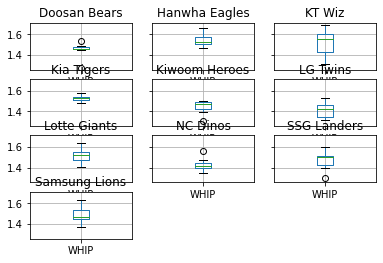

In [16]:
kbo_pitching_10.groupby("team").boxplot(column = 'WHIP')

Doosan Bears          AxesSubplot(0.1,0.736957;0.235294x0.163043)
Hanwha Eagles    AxesSubplot(0.382353,0.736957;0.235294x0.163043)
KT Wiz           AxesSubplot(0.664706,0.736957;0.235294x0.163043)
Kia Tigers            AxesSubplot(0.1,0.541304;0.235294x0.163043)
Kiwoom Heroes    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
LG Twins         AxesSubplot(0.664706,0.541304;0.235294x0.163043)
Lotte Giants          AxesSubplot(0.1,0.345652;0.235294x0.163043)
NC Dinos         AxesSubplot(0.382353,0.345652;0.235294x0.163043)
SSG Landers      AxesSubplot(0.664706,0.345652;0.235294x0.163043)
Samsung Lions             AxesSubplot(0.1,0.15;0.235294x0.163043)
dtype: object

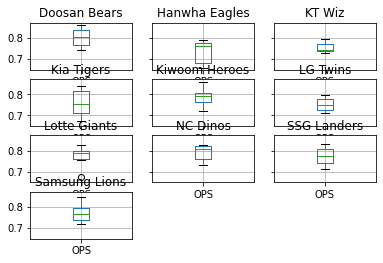

In [19]:
kbo_batting_10.groupby("team").boxplot(column = 'OPS')